In [45]:
%pip install matplotlib
%pip install pandas
%pip install wordcloud
%pip install arabic_reshaper
%pip install python-bidi


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [46]:
from wordcloud import WordCloud, STOPWORDS
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import pandas as pd

In [104]:
lzd_sourece = pd.read_excel('plantbasedfood_lazada.xlsx')
lzd_df = pd.DataFrame(data_sourece, columns=['NameProduct', 'Price', 'no_Review' , 'Location'])
lzd_df.columns = ['name', 'price', 'no_review', 'location']
lzd_df


,name,price,no_review,location
0,(100 กรัม) เม็ดมะม่วงหิมพานต์ เม็ดเต็ม อบธรรมช...,฿45.00,(431),Songkhla
1,(แบบ 3 กล่อง) เครื่องดื่ม Plant Base Protein โ...,฿447.00,(21),Nonthaburi
2,[Plant Based protein] ALL PRO Pea Protein Isol...,"฿3,720.00",(7),Bangkok
3,[คีโต] MOKU บุกข้าวมรกต ขนาด 160 กรัม x 6 Konj...,฿89.10,(232),Pathum Thani
4,[ซื้อ1แถม1] Tana ธนา ปลากรอบรสออริจินัล 65 กรั...,฿49.00,(48),Samut Sakhon
...,...,...,...,...
82,🍄ขาเห็ดหอมปรุงรสเจ (เนื้อแพะขาเห็ดเจ) Youta (โ...,฿124.00,(330),Bangkok
83,🍥ลูกชิ้นปลาเจ Youta (โยตา) ขนาด 450 กรัม (อาหา...,฿83.16,(67),Bangkok
84,🥩หมูกรอบจากพืช มีทซีโร่ (Meat Zero) ขนาด 200 ก...,฿74.00,(151),Bangkok
85,🥩หมูแดงเจ Youta (โยตา) แพ็คใหญ่ ขนาด 1 กิโลกรั...,฿187.00,(7),Bangkok


In [105]:
sp_data_sourece = pd.read_excel('Plant_based_Shopee.xlsx')
sp_df = pd.DataFrame(sp_data_sourece, columns=['Column1', 'name', 'price' , 'amount', 'category', 'company', 'province', 'joined', 'money'])
sp_df

,Column1,name,price,amount,category,company,province,joined,money
0,0,FIRST PRIDE Plant-Based ลาบทอดจากพืชปรุงสุก 170 g,89,58000,อาหารปรุงสุกและอาหารพร้อมทาน,tyson,จังหวัดสมุทรปราการ,NaN,5162000
1,143,MASTI ส่งจากไทย!! ขนมแมว ชุดหญ้าแมว (รวมกล่อง ...,13,25000,CatTreats,kuike136.th,จังหวัดสมุทรปราการ,NaN,325000
2,11,[แช่แข็ง] Meat Zero Plant-Based หมูกรอบจากพืช ...,59,22000,อาหารแปรรูปแช่แข็ง,cpf_online_shop,จังหวัดกรุงเทพมหานคร,NaN,1298000
3,59,ซันแวลเล่ย์ นักเก็ตไก่ (Chicken Nugget Sun Val...,169,16000,อาหารแปรรูปแช่แข็ง,cargillproteinlover,จังหวัดสระบุรี,NaN,2704000
4,132,PINKFLASH PinkGarden Plant Oil-Based Lasting M...,39,16000,ลิปบาล์ม,pinkflash.th,ต่างประเทศ,NaN,624000
...,...,...,...,...,...,...,...,...,...
99,107,CHAME’ Multi Plant Protein สูตรน้ำตาลต่ำ 0% น้...,699,2,เสริมภูมิต้านทาน,ufctrain,จังหวัดกรุงเทพมหานคร,NaN,1398
100,66,[แพค 6] Sewiito KAP KAP ซีวีโต้ แค๊บ แค๊บ แคบห...,360,2,ขนมแห้ง,sewiitointerfood,จังหวัดสมุทรปราการ,NaN,720
101,95,Surapon Foods ขนมจีบจากพืช ตรา วอท เดอะ มีท แ...,99,2,อาหารแปรรูปแช่แข็ง,suraponfoods,จังหวัดสมุทรปราการ,NaN,198
102,138,Well u Aquamin Calcium ผลิตภัณฑ์เสริมอาหาร บำร...,990,1,ข้อต่อกล้ามเนื้อและกระดูก,rsmallofficial,จังหวัดปทุมธานี,NaN,990


In [109]:
amz_sourece = pd.read_excel('amazon.xlsx')
amz_df = pd.DataFrame(amz_sourece, columns=['', 'Name', 'Rating', 'Review' , 'Price'])
amz_df.columns = ['', 'name', 'rating', 'review', 'price']
amz_df

,,name,rating,review,price
0,NaN,ilumot 100% Plant-Based | PREMIUM Compostable ...,-,-,12.5
1,NaN,Orgain Organic Kids Vegan Protein Nutritional ...,4.5 out of 5 stars,1158,-
2,NaN,CLIF BARS - Energy Bars - Chocolate Chip - Mad...,4.6 out of 5 stars,364,-
3,NaN,CLIF BARS - Energy Bars - Best Sellers Variety...,4.7 out of 5 stars,20137,-
4,NaN,"Halo Vegan Adult Dry Dog Food, Plant-Based",4.5 out of 5 stars,690,-
5,NaN,"Larabar Peanut Butter Cookie, Gluten Free Vega...",4.5 out of 5 stars,18843,-
6,NaN,"Orgain Organic Plant Based Protein Bar, Peanut...",4.2 out of 5 stars,5823,-
7,NaN,Orgain Organic Vegan Plant Based Nutritional S...,4.4 out of 5 stars,9360,37
8,NaN,Vana Life's Foods Plant based Ready Meal - Gre...,4.6 out of 5 stars,39,-
9,NaN,"Wellness CORE Bowl Boosters, Functional Meal T...",4.5 out of 5 stars,775,-


In [118]:
products_name = lzd_df.name + sp_df.name + amz_df.name
products_name

0      (100 กรัม) เม็ดมะม่วงหิมพานต์ เม็ดเต็ม อบธรรมช...
1      (แบบ 3 กล่อง) เครื่องดื่ม Plant Base Protein โ...
2      [Plant Based protein] ALL PRO Pea Protein Isol...
3      [คีโต] MOKU บุกข้าวมรกต ขนาด 160 กรัม x 6 Konj...
4      [ซื้อ1แถม1] Tana ธนา ปลากรอบรสออริจินัล 65 กรั...
                             ...                        
99                                                   NaN
100                                                  NaN
101                                                  NaN
102                                                  NaN
103                                                  NaN
Name: name, Length: 104, dtype: object

In [121]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in products_name:
    val = str(val)
    tokens = val.split(' ')

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(font_path="./fonts/Sarabun-Light.ttf", regexp=r"[\u0E00-\u0E7Fa-zA-Z']+", width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 4).generate(comment_words)                   

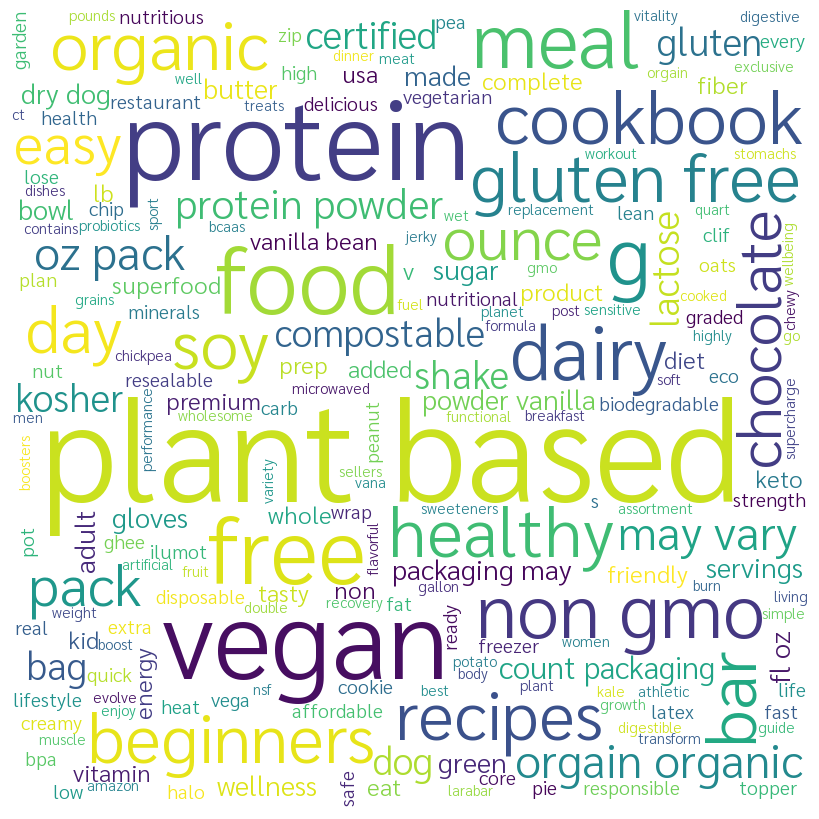

In [122]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()